<div dir=rtl>
<font size = "6">قبل از هر کاری، با استفاده از مسیری که در خط پایین ذکر شده، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.</font>
</div>

<div>
<font size = "4">
File --> Save a copy in Drive
</font>
</div>

# Question 0: Run the cell below without modifying it.

<div dir=rtl>
<font size = "6">بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید.</font>
</div>

In [2]:
#@title Downloading the necessary data for this homework
!pip install pydicom
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37' -O 'HW1_data.zip'
!unzip HW1_data.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.3 MB/s eta 0:00:00
--2023-11-10 15:22:55--  https://drive.google.com/uc?export=download&id=1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37
Resolving drive.google.com (drive.google.com)... 142.250.97.113, 142.250.97.138, 142.250.97.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.97.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rloli4c02hu7g2isqla10ehlfk793sk/1699629750000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=61bf8e97-f50e-4138-b23a-e8c25502e98c [following]
--2023-11-10 15:22:56--  https://doc-0k-2g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rloli4c02hu7g2isqla10ehlfk793sk/1699629750000/16242004942888370848/*/1OAvkWv4guVgXsCJ7nA20Wi0YGCoX0q37?e=download&uuid=61bf8e97-f50e-4138-b23a-e8c25502e98c
Resolving doc-0k-2g-docs.googleu

# The Imports

In [3]:
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.image as mpimg
from PIL import Image
import sys

# Any Helper Functions

<div dir=rtl>
<font size = "6">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ای (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید.</font>
</div>

In [ ]:
###
# ENTER YOUR CODE HERE.
###

# Question 4: (20%)

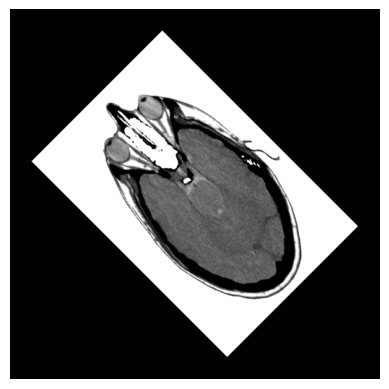

In [25]:
# part1
img = cv.imread('transformed.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Q4 - Part 1 Explanation:
<div dir=rtl>
<font size = "5">Rotation-Scaling

 </font><br />
</div>

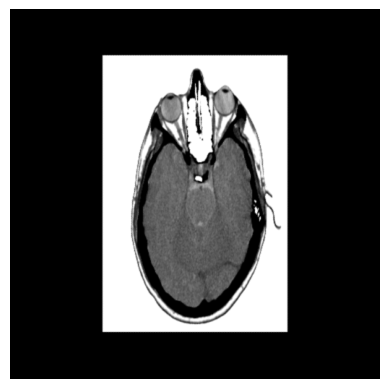

In [26]:
# part2
# Rotaion
rows,cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),315,1)
result = cv.warpAffine(img,M,(cols,rows))
plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

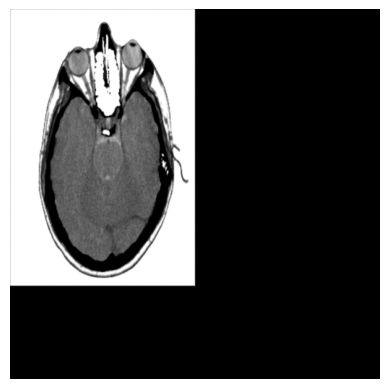

In [27]:
M = np.float32([[1,0,-128],[0,1,-64]])
result2 = cv.warpAffine(result,M,(cols,rows))
plt.imshow(result2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

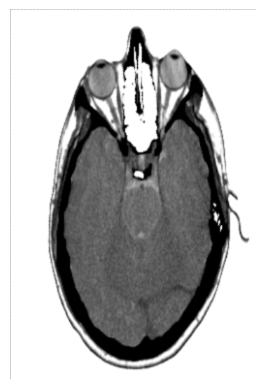

In [28]:
cut_image = result2[:382, 0:254]
plt.imshow(cut_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

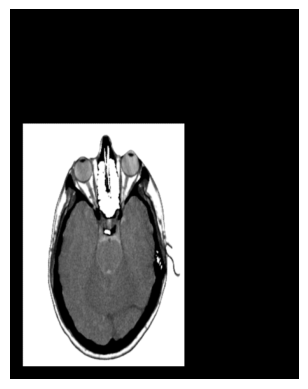

In [30]:
# part3
height, width = cut_image.shape[:2]
add_padding = np.pad(cut_image, ((100,100),(100,100)), mode = 'constant')
rows , cols = add_padding.shape
M = np.float32([[1,0,-80],[0,1,80]])
result3 = cv.warpAffine(add_padding,M,(cols,rows))
plt.imshow(result3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Question 5: (20%)

type: uint8
Dimensions: (512, 512)


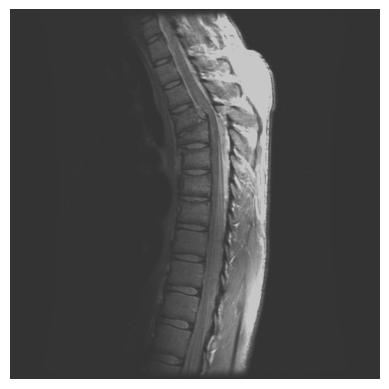

In [31]:
img2 = cv.imread('spine.tif', cv.IMREAD_GRAYSCALE)
print("type:", img2.dtype)
print("Dimensions:", img2.shape)
image2 = img2.astype(np.float64)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

5.297


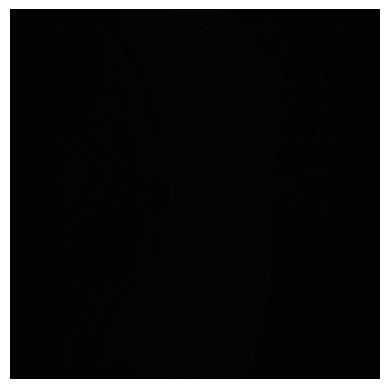

In [32]:
def log_transform(img):
    # print(img)
    convert_img = np.log(1 + img)
    # print(convert_img2)
    return convert_img

convert_by_log_img2 = log_transform(img2)
print(np.max(convert_by_log_img2))
plt.imshow(convert_by_log_img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

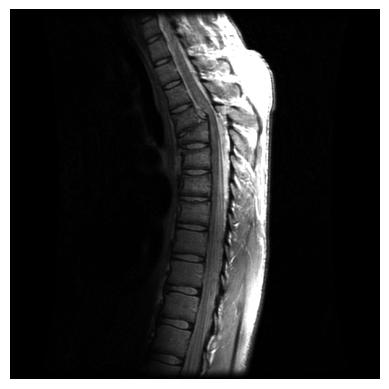

In [33]:
def contrast_stretching(img2):

    minI    = np.min(img2)
    maxI    = np.max(img2)
    minO    = 0
    maxO    = 255

    stretching_img = (img2-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return stretching_img

img2_stretched = contrast_stretching(img2)
plt.imshow(img2_stretched, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

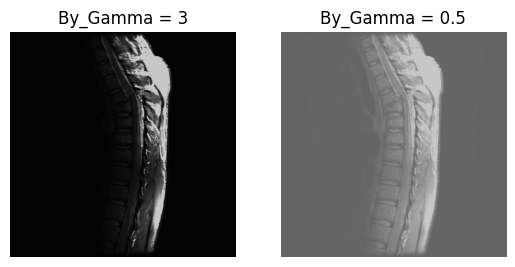

In [34]:
def power_law_transform(img, gamma):
    maxI = np.max(img)
    gamma_corrected = np.array(maxI*(img / maxI) ** gamma, dtype = 'uint8')

    return gamma_corrected

transformed_by_gamma3 = power_law_transform(img2, 3)
transformed_by_gammahalf = power_law_transform(img2, 0.5)

fig, axs = plt.subplots(1, 2)
axs[0].set_title('By_Gamma = 3')
axs[1].set_title('By_Gamma = 0.5')
axs[0].imshow(transformed_by_gamma3, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(transformed_by_gammahalf, cmap='gray', vmin=0, vmax=255)

for ax in axs:
    ax.axis('off')
plt.show()

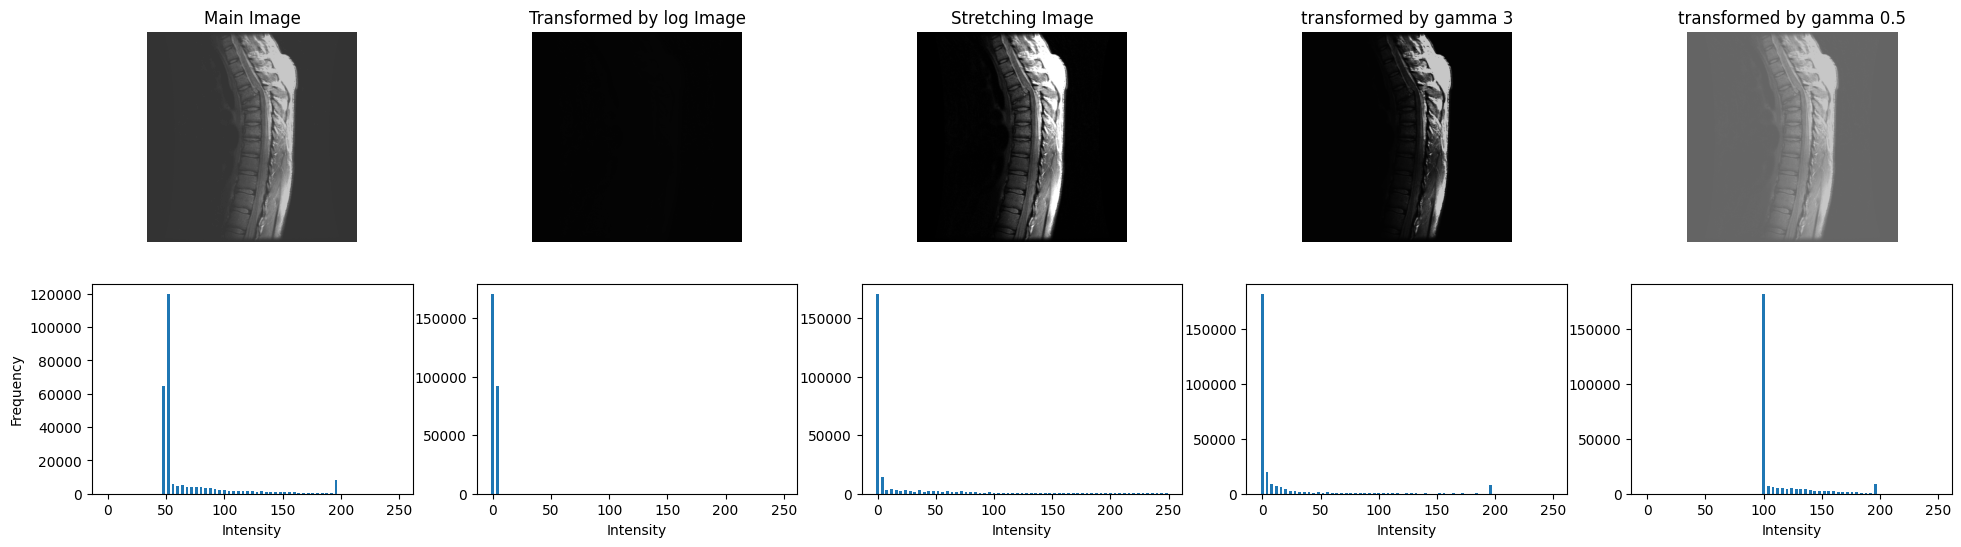

In [35]:
fig, axs = plt.subplots(2, 5, figsize=(24, 6))
axs[0, 0].set_title('Main Image')
axs[0, 1].set_title('Transformed by log Image')
axs[0, 2].set_title('Stretching Image')
axs[0, 3].set_title('transformed by gamma 3')
axs[0, 4].set_title('transformed by gamma 0.5')

axs[0, 0].imshow(img2, cmap='gray', vmin=0, vmax=255)
axs[0, 1].imshow(convert_by_log_img2, cmap='gray', vmin=0, vmax=255)
axs[0, 2].imshow(img2_stretched, cmap='gray', vmin=0, vmax=255)
axs[0, 3].imshow(transformed_by_gamma3, cmap='gray', vmin=0, vmax=255)
axs[0, 4].imshow(transformed_by_gammahalf, cmap='gray', vmin=0, vmax=255)

histogram1 = np.histogram(img2.flatten(), bins=np.arange(0, 256, 4))
histogram2 = np.histogram(convert_by_log_img2.flatten(), bins=np.arange(0, 256, 4))
histogram3 = np.histogram(img2_stretched.flatten(), bins=np.arange(0, 256, 4))
histogram4 = np.histogram(transformed_by_gamma3.flatten(), bins=np.arange(0, 256, 4))
histogram5 = np.histogram(transformed_by_gammahalf.flatten(), bins=np.arange(0, 256, 4))

axs[1, 0].bar(histogram1[1][:-1], histogram1[0], width=4*0.6)
axs[1, 1].bar(histogram2[1][:-1], histogram2[0], width=4*0.6)
axs[1, 2].bar(histogram3[1][:-1], histogram3[0], width=4*0.6)
axs[1, 3].bar(histogram4[1][:-1], histogram4[0], width=4*0.6)
axs[1, 4].bar(histogram5[1][:-1], histogram5[0], width=4*0.6)

axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Intensity')
axs[1, 1].set_xlabel('Intensity')
axs[1, 2].set_xlabel('Intensity')
axs[1, 3].set_xlabel('Intensity')
axs[1, 4].set_xlabel('Intensity')

for ax in axs[0, :].flat:
    ax.axis('off')
plt.show()


# Q5 - Part 6 Explanation (20%):
<div dir=rtl>
<font size = "6">

---


(با توجه به خاصیت تابع لگاریتم)در لگاریتم گرفتن در مبنای نپر کنتراست قسمت تاریک کمتر میشود به همین علت تصویر تاریک است

  در مرحله بعد شدت تصویر را به نوعی کشیدیم و بازترش کردیم این کار باعث می شود
  کنتراست افزایش یابد در نتیجه کیفیت تصویر بهتری داریم
  
  در مرحله بعد ابتدا نرمالایز کردیم سپس عملیات توانی را انجام دادیم
      در گامای 3 به دلیل  ماهیت و شکل تابع توانی، کنتراست قسمت تاریک بیشتر می شود
      در گامای 0.5 هم به همین علت کنتراست کمی در قسمت تاریک داریم در نتیجه کیفیت کمتری داریم .
  
  </font><br/>
</div>

# Question 6: (35%)

type: uint8
Dimensions: (706, 320)


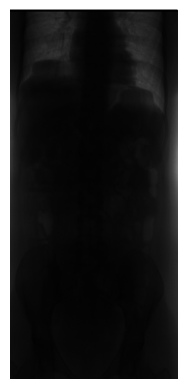

In [36]:
img3 = cv.imread('spineXray.tif', cv.IMREAD_GRAYSCALE)
print("type:", img3.dtype)
print("Dimensions:", img3.shape)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

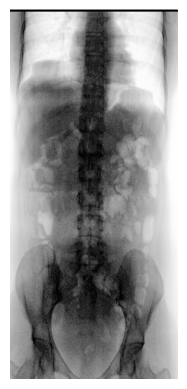

In [37]:
histogram_image = cv.equalizeHist(img3)
plt.imshow(histogram_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

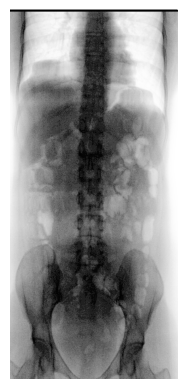

In [38]:
def histogram_equalization(img):
   histogram, bins = np.histogram(img.flatten(), 256, [0, 256])
   temp = histogram.cumsum()
   image_equalize = temp[img]
   image_equalize = ((image_equalize - image_equalize.min()) * 255) / (image_equalize.max() - image_equalize.min())
   return image_equalize

image_equalize = histogram_equalization(img3)
plt.imshow(image_equalize, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

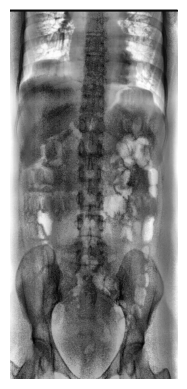

In [39]:
clahe_filter = cv.createCLAHE(clipLimit=40.0, tileGridSize=(8, 8))

clahe_image = clahe_filter.apply(img3)

plt.imshow(clahe_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

CLAHE = Contrast Limited Adaptive Histogram Equalization
createCLAHE(clipLimit,tileGridSize)

clipLimit = This parameter sets the threshold for contrast limiting. The default value is 40.

tileGridSize = This sets the number of tiles in the row and column. By default this is 8×8. It is used while the image is divided into tiles for applying CLAHE.  

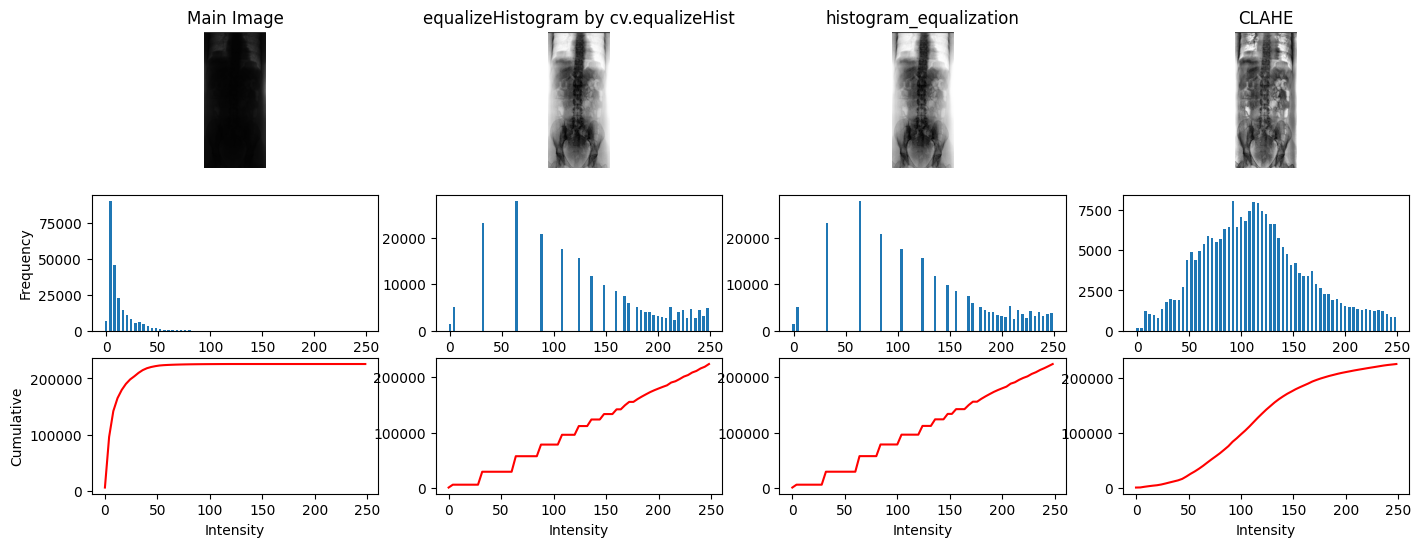

In [40]:
fig, axs = plt.subplots(3, 4, figsize=(17, 6))
axs[0, 0].set_title('Main Image')
axs[0, 1].set_title('equalizeHistogram by cv.equalizeHist')
axs[0, 2].set_title('histogram_equalization')
axs[0, 3].set_title('CLAHE')

axs[0, 0].imshow(img3, cmap='gray', vmin=0, vmax=255)
axs[0, 1].imshow(histogram_image, cmap='gray', vmin=0, vmax=255)
axs[0, 2].imshow(image_equalize, cmap='gray', vmin=0, vmax=255)
axs[0, 3].imshow(clahe_image, cmap='gray', vmin=0, vmax=255)

histogram1 = np.histogram(img3.flatten(), bins=np.arange(0, 256, 4))
histogram2 = np.histogram(histogram_image.flatten(), bins=np.arange(0, 256, 4))
histogram3 = np.histogram(image_equalize.flatten(), bins=np.arange(0, 256, 4))
histogram4 = np.histogram(clahe_image.flatten(), bins=np.arange(0, 256, 4))

axs[1, 0].bar(histogram1[1][:-1], histogram1[0], width=4*0.6)
axs[1, 1].bar(histogram2[1][:-1], histogram2[0], width=4*0.6)
axs[1, 2].bar(histogram3[1][:-1], histogram3[0], width=4*0.6)
axs[1, 3].bar(histogram4[1][:-1], histogram4[0], width=4*0.6)

axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Intensity')
axs[1, 1].set_xlabel('Intensity')
axs[1, 2].set_xlabel('Intensity')
axs[1, 3].set_xlabel('Intensity')


cdf1 = histogram1[0].cumsum()
cdf2 = histogram2[0].cumsum()
cdf3 = histogram3[0].cumsum()
cdf4 = histogram4[0].cumsum()

axs[2, 0].plot(histogram1[1][:-1], cdf1, color='r')
axs[2, 1].plot(histogram2[1][:-1], cdf2, color='r')
axs[2, 2].plot(histogram3[1][:-1], cdf3, color='r')
axs[2, 3].plot(histogram4[1][:-1], cdf4, color='r')

axs[2, 0].set_ylabel('Cumulative')
axs[2, 0].set_xlabel('Intensity')
axs[2, 1].set_xlabel('Intensity')
axs[2, 2].set_xlabel('Intensity')
axs[2, 3].set_xlabel('Intensity')



for ax in axs[0, :].flat:
    ax.axis('off')
plt.show()

Q6 - Part 6 Explanation (10%):

<div dir=rtl>
<font size = "5"> در تصویر دوم و سوم یکتواختی هیستوگرام را به دو شیوه مختلف انجام دادیم که تقریبا جواب یکسانی را میدهد این کار باعث می شود جاهای خالی شدت را پر کنیم و
 ازطیف های بیشتری استفاده کنیم که بر کیفیت تصویر می افزاید.
 در نمودار آخر با فیلتر کردن تصویر و استفاده از ترشورد توانستیم کنتراست رو افزایش دهیم و کیفیت بهتری را بدست بیاوریم  

 ردیف آخر نشان دهنده مجموع پیکسل های با شدت کوچکتر از یک شدت خاص هستند که در نتیجه همه افزایشی هستند.  </font><br />
</div>

   
       

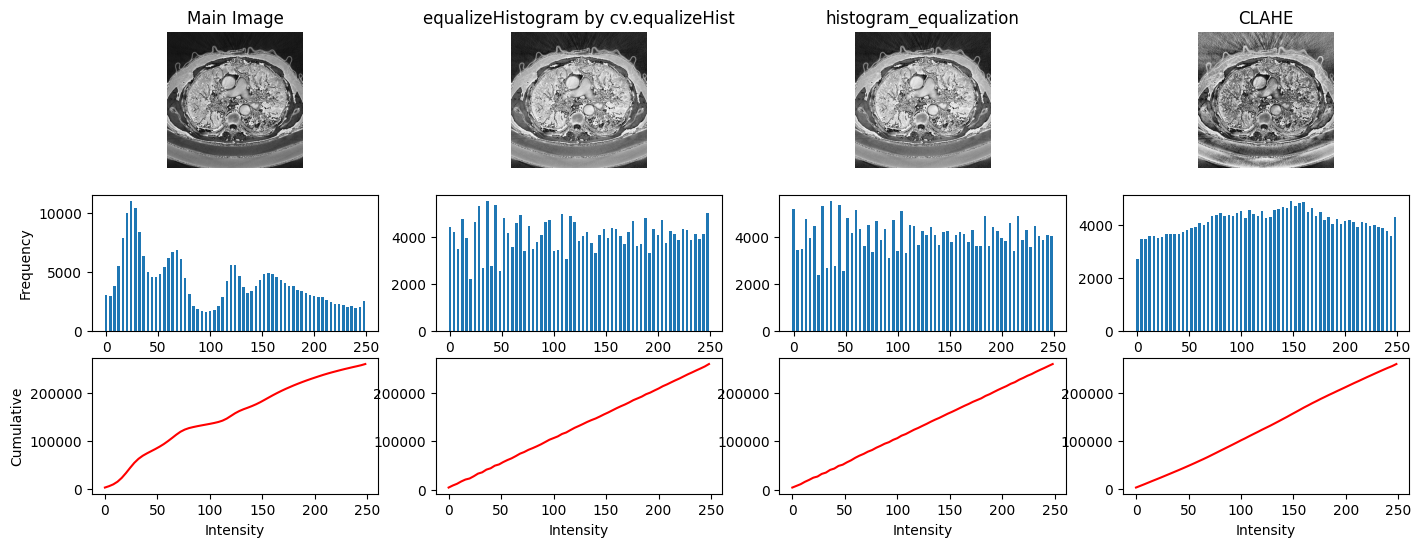

In [41]:
import pydicom
img4 = pydicom.dcmread('file.dcm')
img_array = img4.pixel_array
img_array = img_array.astype(np.uint8)
# plt.imshow(img_array, cmap='gray')
# plt.axis('off')
# plt.show()
# -------------------------------------------------------------------------
img1_equalize = cv.equalizeHist(img_array)
# plt.imshow(img1_equalize, cmap='gray')
# plt.axis('off')
# plt.show()
# --------------------------------------------------------------------------
img1_equalize2 = histogram_equalization(img_array)
# plt.imshow(img1_equalize2, cmap='gray', vmin=0, vmax=255)
# plt.axis('off')
# plt.show()
# -------------------------------------------------------------------------
clahe2 = clahe_filter.apply(img_array)
# plt.imshow(clahe_image2, cmap='gray', vmin=0, vmax=255)
# plt.axis('off')
# plt.show()
# -------------------------------------------------------------------------
# -------------------------------------------------------------------------

fig, axs = plt.subplots(3, 4, figsize=(17, 6))
axs[0, 0].set_title('Main Image')
axs[0, 1].set_title('equalizeHistogram by cv.equalizeHist')
axs[0, 2].set_title('histogram_equalization')
axs[0, 3].set_title('CLAHE')

axs[0, 0].imshow(img_array, cmap='gray', vmin=0, vmax=255)
axs[0, 1].imshow(img1_equalize, cmap='gray', vmin=0, vmax=255)
axs[0, 2].imshow(img1_equalize2, cmap='gray', vmin=0, vmax=255)
axs[0, 3].imshow(clahe2, cmap='gray', vmin=0, vmax=255)

histogram1 = np.histogram(img_array.flatten(), bins=np.arange(0, 256, 4))
histogram2 = np.histogram(img1_equalize.flatten(), bins=np.arange(0, 256, 4))
histogram3 = np.histogram(img1_equalize2.flatten(), bins=np.arange(0, 256, 4))
histogram4 = np.histogram(clahe2.flatten(), bins=np.arange(0, 256, 4))

axs[1, 0].bar(histogram1[1][:-1], histogram1[0], width=4*0.6)
axs[1, 1].bar(histogram2[1][:-1], histogram2[0], width=4*0.6)
axs[1, 2].bar(histogram3[1][:-1], histogram3[0], width=4*0.6)
axs[1, 3].bar(histogram4[1][:-1], histogram4[0], width=4*0.6)

axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlabel('Intensity')
axs[1, 1].set_xlabel('Intensity')
axs[1, 2].set_xlabel('Intensity')
axs[1, 3].set_xlabel('Intensity')


cdf1 = histogram1[0].cumsum()
cdf2 = histogram2[0].cumsum()
cdf3 = histogram3[0].cumsum()
cdf4 = histogram4[0].cumsum()

axs[2, 0].plot(histogram1[1][:-1], cdf1, color='r')
axs[2, 1].plot(histogram2[1][:-1], cdf2, color='r')
axs[2, 2].plot(histogram3[1][:-1], cdf3, color='r')
axs[2, 3].plot(histogram4[1][:-1], cdf4, color='r')

axs[2, 0].set_ylabel('Cumulative')
axs[2, 0].set_xlabel('Intensity')
axs[2, 1].set_xlabel('Intensity')
axs[2, 2].set_xlabel('Intensity')
axs[2, 3].set_xlabel('Intensity')



for ax in axs[0, :].flat:
    ax.axis('off')
plt.show()

Q6 - Part 7 Explanation:
<div dir=rtl>
<font size = "5">تصویر اصلی کیفیت بهتری نسبت به بقیه تصاویر دارد با یکنواخت کردن هیستوگرام باعث می شود که کنتراست شدت ها کم شود در نتیجه کیفیت کمتری داریم

در ردیف آخر باتوجه به نمودار تجمعی می توان متوجه شد که تعداد هر شدت تقربیا با یکدیگر برابر است.</font><br />
</div>

<div dir=rtl>
<font size = "5">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)

</font><br />
</div>


<div dir=rtl>
<font size = "5">
**	حتماً توجه کنید که در هنگام تحویل و آخرین ویرایش روی کد خود، خروجی همه‌ی بلاک‌ها، خروجی درست و نهایی همان بلاک باشد. (بطور مثال ممکن است تغییری در کد بدهید و رویت کنید که خروجی درست نیست و فقط تغییرتان را undo کرده ولی دوباره اجرایش نکنید و خروجی سلول همان خروجی دوم که جواب اشتباهی بود بماند).

</font><br />
</div>


<div dir=rtl>
<font size = "5">	**	نکته مهم: لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font><br />
</div>


<div dir=rtl>
<font size = "5">	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW1_Num باشند که Num شماره دانشجویی شما است مانند HW1_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font><br />
</div>
